# Jet pp Consistency with Kelner 2006

Hadronic pp process is still preliminary, the testing is still ongoing. 
Based on Klener et al. 2006: https://link.aps.org/doi/10.1103/PhysRevD.74.034018

In [1]:
from jetset.jet_model import Jet
from astropy import constants as const
from jetset.jet_emitters_factory import EmittersFactory
from jetkernel import jetkernel


In [2]:
n_p_bkn=EmittersFactory().create_emitters('plc',emitters_type='protons',normalize=True)

In [3]:
n_p_bkn.parameters.show_pars()

   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
     gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
        N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
    NH_pp      target_density         1 / cm3 1.000000e+00     0.000000e+00               -- False  False
gamma_cut    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
        p   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False


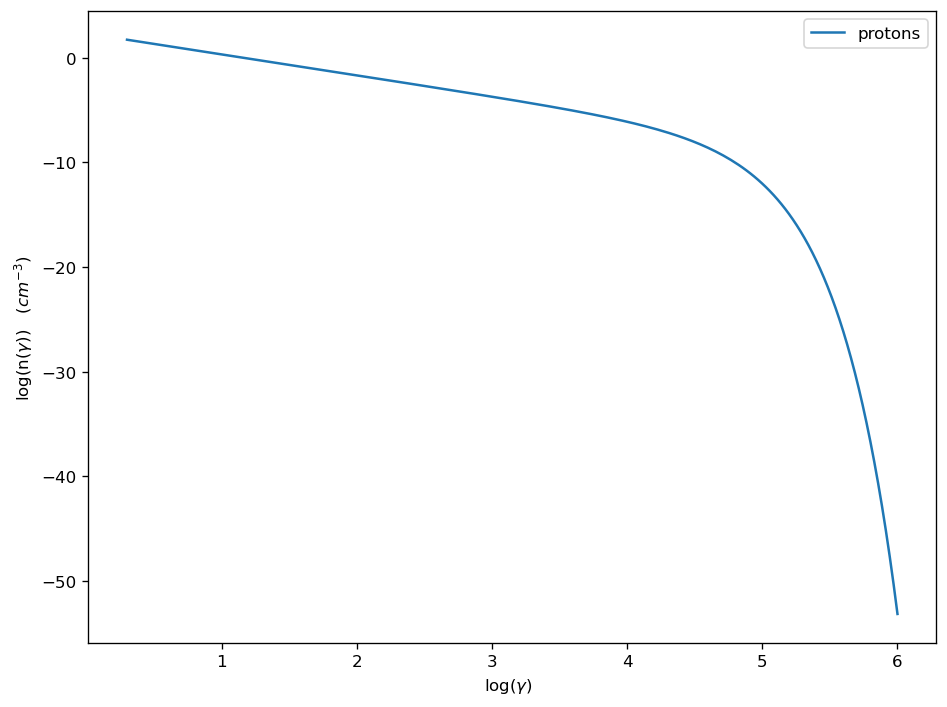

In [4]:
n_p_bkn.plot()

In [5]:
j=Jet(emitters_distribution='plc',verbose=False,emitters_type='protons')

In [6]:
j


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_hadronic_pp  

protons distribution:
 type: plc  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:PP_gamma, state: on
   name:PP_neutrino_tot, state: on
   name:PP_neutrino_mu, state: on
   name:PP_neutrino_e, state: on
   name:Bremss_ep, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound

None

In [7]:

j.parameters.z_cosm.val=z=0.001
j.parameters.beam_obj.val=1
j.parameters.gamma_cut.val=1000/(jetkernel.MPC2_TeV)
j.parameters.NH_pp.val=1
j.parameters.N.val=107.00
j.parameters.p.val=2.0
j.parameters.B.val=0.01
j.parameters.R.val=1E18
j.parameters.gmin.val=1
j.parameters.gmax.val=1E8
j.set_emiss_lim(1E-60)
j.set_IC_nu_size(100)
j.gamma_grid_size=200
#j._blob.E_th_pp_delta_approx=0.1
#j._blob.E_pp_x_delta_approx=0.000

j.eval()

#j.show_model()

m=j.emitters_distribution.gamma_p*jetkernel.MPC2_TeV>1
print('U N(p) p>1 TeV=%e erg/cm-3'%(jetkernel.MPC2*np.trapz(j.emitters_distribution.n_gamma_p[m]*j.emitters_distribution.gamma_p[m],j.emitters_distribution.gamma_p[m])))

U N(p) p>1 TeV=1.011333e+00 erg/cm-3


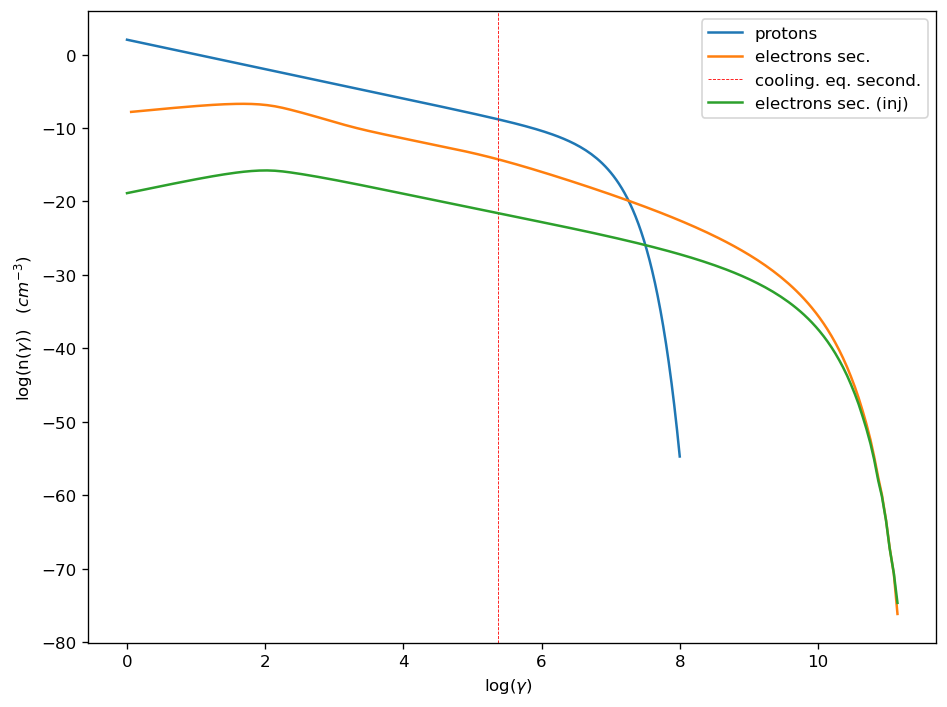

In [8]:
j.emitters_distribution.plot()

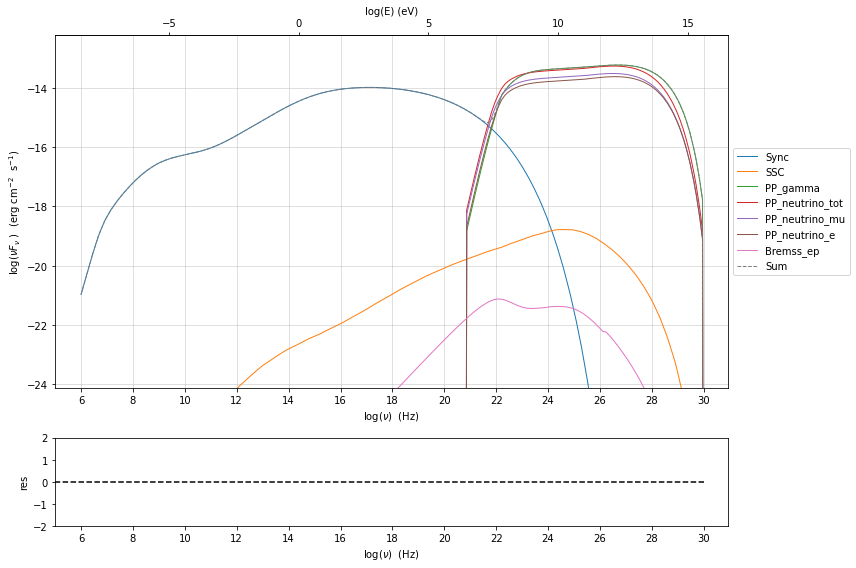

In [9]:
p=j.plot_model()

In [10]:

def get_component(j_name,nu_name):
    j_nu_ptr=getattr(j._blob,j_name)
    nu_ptr=getattr(j._blob,nu_name)
    xg=np.zeros(j._blob.nu_grid_size)
    yg=np.zeros(j._blob.nu_grid_size)
    for i in range(j._blob.nu_grid_size):
        xg[i]=jetkernel.get_spectral_array(nu_ptr,j._blob,i)
        yg[i]=jetkernel.get_spectral_array(j_nu_ptr,j._blob,i)
    
    m=yg>0

    xg=xg[m]
    yg=yg[m]
    yg=yg*xg
    yg=yg*jetkernel.erg_to_TeV

    xg=xg*jetkernel.HPLANCK_TeV
    
    return xg,yg



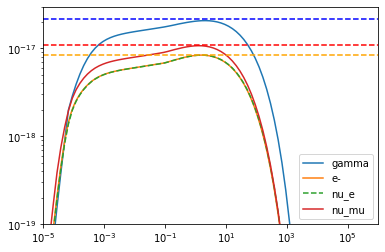

In [11]:
%matplotlib inline
#Fig 12 Kelner 2006

#j_nu_pp rate
xg,yg= get_component('j_pp_gamma','nu_pp_gamma')
x_nu_e,y_nu_e= get_component('j_pp_neutrino_e','nu_pp_neutrino_e')
x_nu_mu,y_nu_mu= get_component('j_pp_neutrino_mu','nu_pp_neutrino_mu')
x_nu_tot,y_nu_tot= get_component('j_pp_neutrino_tot','nu_pp_neutrino_tot')
x_nu_mu_2=x_nu_mu
y_nu_2=(y_nu_tot-y_nu_mu)*np.pi*4
x_nu_mu_1=x_nu_mu
y_nu_mu_1=(y_nu_mu-y_nu_2)*np.pi*4

yg=yg*np.pi*4
y_nu_mu=y_nu_mu*np.pi*4
y_nu_e=y_nu_e*np.pi*4
#e-  rate
x_inj=np.copy(j.emitters_distribution.gamma_e_second_inj)
y_inj=np.copy(j.emitters_distribution.n_gamma_e_second_inj)
y_e=y_inj*x_inj*x_inj*jetkernel.MEC2_TeV
x_e=x_inj*0.5E6/1E12

plt.loglog(xg,yg,label='gamma')
plt.loglog(x_e,y_e,label='e-')
plt.loglog(x_nu_e,y_nu_e,'--',label='nu_e')
plt.loglog(x_nu_mu,y_nu_mu,label='nu_mu')

#plt.loglog(x_nu_mu_1,y_nu_mu_1,label='nu_mu_1')

plt.ylim(1E-19,3E-17)#
plt.xlim(1E-5,1E6)

plt.legend()
plt.axhline(2.15E-17,ls='--',c='b')
plt.axhline(8.5E-18,ls='--',c='orange')
plt.axhline(1.1E-17,ls='--',c='r')
